In [0]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [0]:
from keras.models import load_model

Using TensorFlow backend.


In [0]:
model = load_model('/content/gdrive/My Drive/Machine_Learning/ASS3_Q2_128.h5')

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Use tf.cast instead.


In [0]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg19 (Model)                (None, 4, 4, 512)         20024384  
_________________________________________________________________
flatten_1 (Flatten)          (None, 8192)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 256)               2097408   
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 257       
Total params: 22,122,049
Trainable params: 11,536,897
Non-trainable params: 10,585,152
_________________________________________________________________


In [0]:
from keras import models

base_model = model.get_layer('vgg19')


In [0]:
base_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 150, 150, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 150, 150, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 150, 150, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 75, 75, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 75, 75, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 75, 75, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 37, 37, 128)       0         
__________

In [0]:
#layer_outputs = base_model.get_layer('block5_conv4').output
#layer_outputs = [layer.output for layer in base_model.layers[1:]]
#input_layer = base_model.get_layer('input_1')

activation_model = models.Model(input=model.input, outputs=model.get_layer('dense_1').output)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: UserWarning: Update your `Model` call to the Keras 2 API: `Model(outputs=Tensor("de..., inputs=Tensor("vg...)`
  


In [0]:
!wget --no-check-certificate \
    https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip \
    -O /tmp/cats_and_dogs_filtered.zip

--2019-04-18 04:27:03--  https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.142.128, 2607:f8b0:400e:c07::80
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.142.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 68606236 (65M) [application/zip]
Saving to: ‘/tmp/cats_and_dogs_filtered.zip’

/tmp/cats_and_dogs_ 100%[===================>]  65.43M  43.2MB/s    in 1.5s    

2019-04-18 04:27:05 (43.2 MB/s) - ‘/tmp/cats_and_dogs_filtered.zip’ saved [68606236/68606236]



In [0]:
import os
import zipfile

local_zip = '/tmp/cats_and_dogs_filtered.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp')
zip_ref.close()

In [0]:
base_dir = '/tmp/cats_and_dogs_filtered'
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')

# Directory with our training cat pictures
train_cats_dir = os.path.join(train_dir, 'cats')

# Directory with our training dog pictures
train_dogs_dir = os.path.join(train_dir, 'dogs')

# Directory with our validation cat pictures
validation_cats_dir = os.path.join(validation_dir, 'cats')

# Directory with our validation dog pictures
validation_dogs_dir = os.path.join(validation_dir, 'dogs')

In [0]:
img_path = '/tmp/cats_and_dogs_filtered/validation/dogs/dog.2001.jpg'



In [0]:
import time
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patheffects as PathEffects
%matplotlib inline
import seaborn as sns

In [0]:
from keras.preprocessing import image
import numpy as np

img = image.load_img(img_path, target_size=(150, 150))
img_tensor = image.img_to_array(img)
img_tensor = np.expand_dims(img_tensor, axis=0)
img_tensor /= 255.

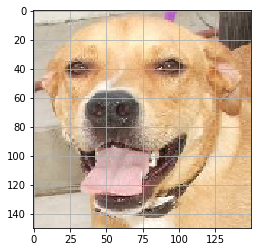

In [0]:
%matplotlib inline

import matplotlib.pyplot as plt

plt.imshow(img_tensor[0])
plt.grid(None)
plt.show()

In [0]:
activations = activation_model.predict(img_tensor)

In [0]:
len(activations)

1

In [0]:
first_layer_activation = activations[0]

In [0]:
first_layer_activation.shape

(256,)

In [0]:
first_layer_activation

array([7.748069  , 3.5483644 , 6.94712   , 0.        , 6.971791  ,
       5.407942  , 7.2532053 , 6.6974096 , 0.        , 6.407858  ,
       0.        , 0.        , 0.        , 1.1893083 , 0.        ,
       0.        , 0.        , 0.        , 3.720542  , 0.        ,
       8.614939  , 0.        , 0.        , 5.3291497 , 0.71812207,
       0.        , 0.        , 7.320869  , 0.        , 7.1352363 ,
       0.        , 7.445998  , 0.        , 5.126429  , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.7166821 ,
       6.0158157 , 0.        , 7.4160542 , 5.5199256 , 0.        ,
       5.799478  , 6.585057  , 0.2728114 , 7.280272  , 7.4910126 ,
       7.857441  , 0.        , 4.36545   , 0.        , 0.        ,
       0.        , 0.        , 0.        , 6.5836706 , 0.        ,
       8.63383   , 0.        , 5.5130496 , 0.        , 0.        ,
       6.5069003 , 8.318429  , 7.4989266 , 7.43598   , 7.701527  ,
       0.        , 5.9457884 , 0.        , 0.        , 0.     

In [0]:
#plt.matshow(first_layer_activation[0,:, :, 28], cmap='viridis')
#plt.grid(None)
#plt.show()

In [0]:
last_layer_activation = activations[-1]

In [0]:
last_layer_activation.shape

(256,)

In [0]:
last_layer_activation

array([7.748069  , 3.5483644 , 6.94712   , 0.        , 6.971791  ,
       5.407942  , 7.2532053 , 6.6974096 , 0.        , 6.407858  ,
       0.        , 0.        , 0.        , 1.1893083 , 0.        ,
       0.        , 0.        , 0.        , 3.720542  , 0.        ,
       8.614939  , 0.        , 0.        , 5.3291497 , 0.71812207,
       0.        , 0.        , 7.320869  , 0.        , 7.1352363 ,
       0.        , 7.445998  , 0.        , 5.126429  , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.7166821 ,
       6.0158157 , 0.        , 7.4160542 , 5.5199256 , 0.        ,
       5.799478  , 6.585057  , 0.2728114 , 7.280272  , 7.4910126 ,
       7.857441  , 0.        , 4.36545   , 0.        , 0.        ,
       0.        , 0.        , 0.        , 6.5836706 , 0.        ,
       8.63383   , 0.        , 5.5130496 , 0.        , 0.        ,
       6.5069003 , 8.318429  , 7.4989266 , 7.43598   , 7.701527  ,
       0.        , 5.9457884 , 0.        , 0.        , 0.     

In [0]:
#plt.matshow(last_layer_activation, cmap='viridis')
#plt.grid(None)
#plt.show()

In [0]:
#plt.matshow(last_layer_activation[0], cmap='viridis')
#plt.grid(None)
#plt.show()

In [0]:
from keras.preprocessing.image import ImageDataGenerator
from keras import optimizers

validation_datagen = ImageDataGenerator(rescale=1./255)

validation_generator = validation_datagen.flow_from_directory(
    validation_dir,
    target_size=(150, 150),
    batch_size=1000,
    class_mode='binary')

Found 1000 images belonging to 2 classes.


In [0]:
images, labels = next(validation_generator)
activations = activation_model.predict(images)

In [0]:
len(activations)

1000

In [0]:
labels.astype(int)

array([0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1,
       0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0,
       0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0,
       1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0,
       1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1,
       1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1,
       1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0,

In [0]:
class_names = ["Cat", "Dog"]

def data_scatter(vecs, labels):
    # choose a color palette with seaborn.
    num_classes = len(np.unique(labels))
    palette = np.array(sns.color_palette("husl", num_classes))

    # create a scatter plot.
    f = plt.figure(figsize=(12, 12))
    ax = plt.subplot(aspect='equal')
    sc = ax.scatter(vecs[:, 0], vecs[:, 1], c=palette[labels])
    plt.xlim(-25, 25)
    plt.ylim(-25, 25)
    ax.axis('off')
    ax.axis('tight')


    for idx in range(num_classes):

        # Place label at median position of vectors with corresponding label

        x_coord, y_coord = np.median(vecs[labels == idx, :], axis=0)
        txt = ax.text(x_coord, y_coord, class_names[idx], fontsize=24)
        # plot class index black with white contour
        txt.set_path_effects([
            PathEffects.Stroke(linewidth=6, foreground="w"),
            PathEffects.Normal()])

In [0]:
from sklearn.manifold import TSNE
import time
time_start = time.time()

cat_dog_tsne = TSNE(random_state=42).fit_transform(activations)

print('t-SNE done! Time elapsed: {} seconds'.format(time.time() - time_start))

t-SNE done! Time elapsed: 6.825212478637695 seconds


In [0]:
labels = labels.astype(int)

In [0]:
labels.dtype

dtype('int64')

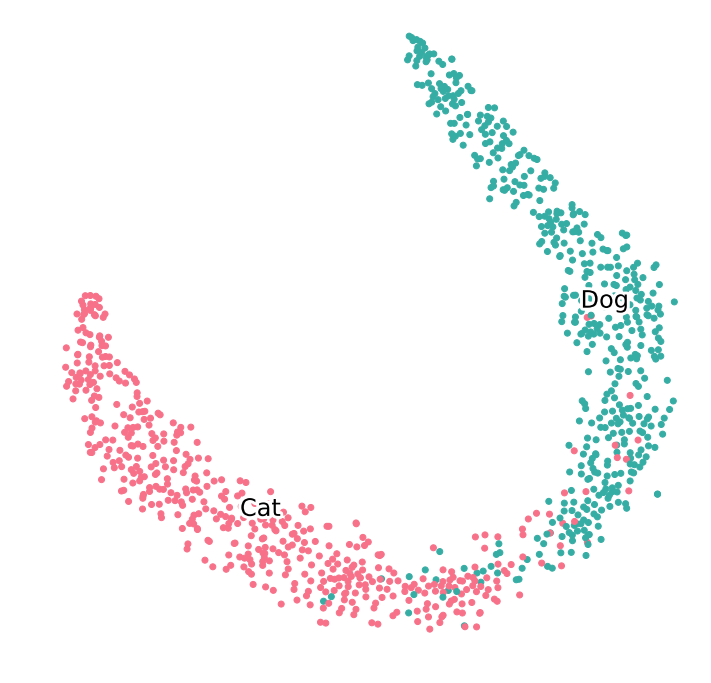

In [0]:
data_scatter(cat_dog_tsne, labels)